In [26]:
import torch # YOLOv5 implemented using pytorch

In [27]:
from IPython.display import Image #this is to render predictions

In [28]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [29]:
%cd yolov5

C:\Users\Hasan\Desktop\YOLO v5\TFLite-Object-Detection-Android-App-Tutorial-Using-YOLOv5-main\yolov5\yolov5\yolov5


In [30]:
!pip install -r requirements.txt

In [31]:
!pip install IProgress
from tqdm import tqdm
import IProgress
from ipywidgets import IntProgress

In [32]:
#torch.cuda.get_arch_list() 

In [33]:
print('All set. Using PyTorch version %s with %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

All set. Using PyTorch version 2.1.0+cpu with CPU


# Training the yolov5 Model

 Once all the files are cloned, you’ll need to move the dataset’s dataset.yaml file to the yolov5/data directory. 
 This file contains information required by YOLO to train the model on the custom data. 

In [39]:
!python train.py --img 416 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Hasan\Desktop\YOLO': No such file or directory
YOLOv5  2023-10-12 Python-3.11.6 torch-2.1.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

If you want to explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

In [40]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

# Testing the Model on Google Colab
Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label:

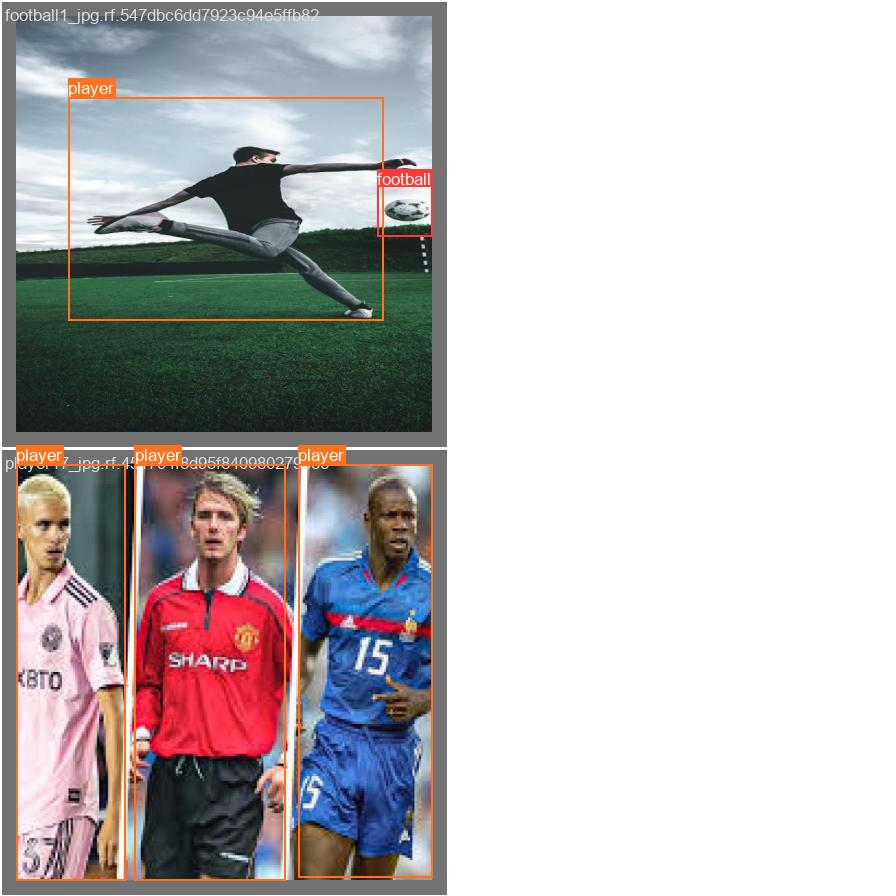

In [43]:
Image(filename='runs/train/exp4/val_batch0_labels.jpg', width=1000)

# Testing the Model:

detect: weights=['runs/train/exp4/weights/best.pt'], source=runs/train/exp4/test_images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\Hasan\Desktop\YOLO': No such file or directory
YOLOv5  2023-10-12 Python-3.11.6 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 C:\Users\Hasan\Desktop\YOLO v5\TFLite-Object-Detection-Android-App-Tutorial-Using-YOLOv5-main\yolov5\yolov5\yolov5\runs\train\exp4\test_images\football3_jpg.rf.c7d986b4a06a94a7882a71b6f3c5d011.jpg: 416x416 1 player, 142.3ms
image 2/3 C:\Users\Hasan\Desktop\YOLO v5\

# Yolov5 model is trained and tested. 

# Now next step is to convert it into a tflite model, so that we can use it on android phone


### you have best.pt and last.pt inside runs\train\exp2\weights

In [50]:
# Convert weights to fp16 TFLite model

!python export.py --weights runs/train/exp4/weights/best.pt --include tflite --img 416

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(1, 416, 416, 3)]           0         []                            
                                                                                                  
 tf_conv (TFConv)            (1, 208, 208, 32)            3488      ['input_1[0][0]']             
                                                                                                  
 tf_conv_1 (TFConv)          (1, 104, 104, 64)            18496     ['tf_conv[0][0]']             
                                                                                                  
 tfc3 (TFC3)                 (1, 104, 104, 64)            18624     ['tf_conv_1[0][0]']           
                                                                                              

export: data=C:\Users\Hasan\Desktop\YOLO v5\TFLite-Object-Detection-Android-App-Tutorial-Using-YOLOv5-main\yolov5\yolov5\yolov5\data\coco128.yaml, weights=['runs/train/exp4/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
fatal: cannot change to 'C:\Users\Hasan\Desktop\YOLO': No such file or directory
YOLOv5  2023-10-12 Python-3.11.6 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs\train\exp4\weights\best.pt with output shape (1, 10647, 8) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.14.0...

                 from  n    params  module                                  arguments                     
  0               

In [51]:
#After running the above command, you will have best-fp16.tflite in runs\train\exp2\weights folder

# Lets run the created tflite model.

!python detect.py --weights runs\train\exp4\weights\best-fp16.tflite --img 416 --conf 0.25 --source runs/train/exp4/test_images

detect: weights=['runs\\train\\exp4\\weights\\best-fp16.tflite'], source=runs/train/exp4/test_images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\Hasan\Desktop\YOLO': No such file or directory
YOLOv5  2023-10-12 Python-3.11.6 torch-2.1.0+cpu CPU

Loading runs\train\exp4\weights\best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/3 C:\Users\Hasan\Desktop\YOLO v5\TFLite-Object-Detection-Android-App-Tutorial-Using-YOLOv5-main\yolov5\yolov5\yolov5\runs\train\exp4\test_images\football3_jpg.rf.c7d986b4a06a94a7882a71b6f3c5d011.jpg: 416x41

# Our model is working fine and results are stored in runs\detect\exp3

## 3. Get the android folder from here
https://github.com/AarohiSingla/TFLite-Object-Detection-Android-App-Tutorial-Using-YOLOv5

In [ ]:
#Convert weights to int8 TFLite model

#!python export.py --weights runs/train/exp2/weights/best.pt --include tflite --int8 --img 416 --data data/coco128.yaml

### Now Put TFLite models in assets folder of Android project, and change

And then open android/app/src/main/java/org/tensorflow/lite/examples/detection/tflite/DetectorFactory.java

Do the following changes:

Change the inputSize of image as per your dataset.

Change labelFilename according to the classes of the model

    
Then run the program in Android Studio.